## DECISION TREE

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
data = pd.DataFrame({
    'age': [22, 35, 47, 52, 23, 40, 60, 30, 45, 29],
    'income': [3.5, 7.2, 5.0, 9.5, 2.8, 6.0, 4.2, 6.8, 5.5, 3.0],
    'credit_score': [650, 720, 580, 790, 610, 700, 640, 710, 690, 600],
    'has_default': [0, 0, 1, 0, 1, 0, 1, 0, 0, 1],
    'approved': [1, 1, 0, 1, 0, 1, 0, 1, 1, 0]
})

In [3]:
X = data[["age", "income", "credit_score", "has_default"]]
y = data[["approved"]]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [6]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
y_prediction = model.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_prediction))

Accuracy :  1.0


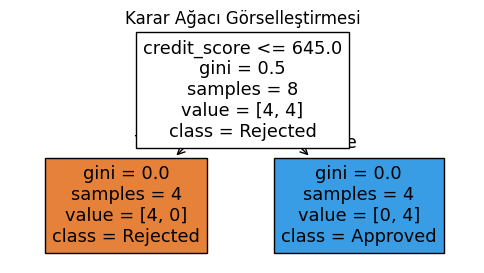

In [12]:
plt.figure(figsize=(6, 3))
tree.plot_tree(model, feature_names=X.columns, 
               class_names=["Rejected", "Approved"], filled=True)
plt.title("Karar Ağacı Görselleştirmesi")
plt.show()

## with Function : 


In [40]:
import random

In [41]:
def generateData(m=1000):
    data = []
    for _ in range(1000):
        age = random.randint(20, 65)
        income = round(random.uniform(2.5, 15.0),2)
        credit_score = random.randint(300, 800)
        has_default = random.choice([0, 1])
        approved = 1 if credit_score>650 and income>5 and not has_default else 0
        data.append([age, income, credit_score, has_default, approved])
    return pd.DataFrame(data, columns= ["age", "income", "credit_score", "has_default", "approved"])

In [42]:
df = generateData()

In [43]:
X = df[["age", "income", "credit_score", "has_default"]]
y = df[["approved"]]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [45]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
y_prediction = model.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_prediction))

Accuracy :  1.0


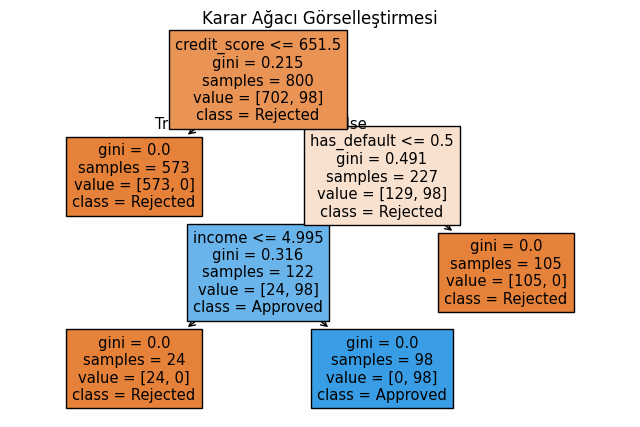

In [47]:
plt.figure(figsize=(8, 5))
tree.plot_tree(model, feature_names=X.columns, 
               class_names=["Rejected", "Approved"], filled=True)
plt.title("Karar Ağacı Görselleştirmesi")
plt.show()

In [49]:
import joblib
from flask import Flask, request, jsonify
from fastapi import FastAPI
from pydantic import BaseModel               # 

In [50]:
joblib.dump(model, "credit_model.pkg")

['credit_model.pkg']

In [51]:
app = FastAPI(title = "Credit Approval API", description="Credit Approval API using Decision Trees")

**HWs**

**HW 1.** 
Decision Trees gini yerine alternatif ne kullanılabilir ? Farkı Nedir ? 

**HW 2.**
Pydantic ile başka neler yapılabilir ? 

**HW 3.**
Faker kütüphanesi ne işe yarar? Detaylı araştırınız.


In [ ]:
class Applicant(BaseModel):
    age:int
    income:float
    credit_score:int
    has_default:int

In [52]:
@app.post("/predict",tags=["prediction"])
def predict_approval(applicant:Applicant):
  data_model = joblib.load("credit_model.pkl")
  input_data = [[applicant.age,applicant.income,applicant.credit_score,applicant.has_default]]
  prediction = data_model.predict(input_data)[0]
  result = "Approved" if prediction==1 else "Rejected"

  return {
      "prediction": result,
      "details":{
          "age" : applicant.age,
          "income": applicant.income,
          "credit_score":applicant.credit_score,
          "has_default":applicant.has_default
      }
  }
  

SyntaxError: incomplete input (4281223425.py, line 1)

In [ ]:
#pip ile uvicorn indirin 
uvicorn main:app --reload

Proje Başlığı: Satış Tahmini API Projesi (Northwind Verisi ile)

İş Hedefi ve Genel Tanım Amaç, Northwind veritabanındaki sipariş verilerini kullanarak bir makine öğrenmesi modeli eğitmek ve bu modeli dış dünyaya bir REST API ile sunmaktır. Bu proje sonunda dış sistemler, geçmiş veriyle eğitilmiş modele API üzerinden ürün bazlı satış tahminleri göndererek tahmin sonucunu alabileceklerdir.

**Gereksinimler**

**1 Teknik Gereksinimler Programlama dili: Python 3.x**

- Veri tabanı: SQLite / PostgreSQL (Northwind)

- API framework: FastAPI

- Makine öğrenmesi: scikit-learn

- Veri işleme: pandas, numpy

- Veri erişimi: SQLAlchemy

- Dokümantasyon: Swagger (FastAPI ile otomatik)

**2.2 Fonksiyonel Gereksinimler Northwind veritabanından veri çekilecek.**

- Gerekli veri ön işleme adımları yapılacak.

- Ürün bazlı geçmiş satış verilerine göre tahmin modeli oluşturulacak.

->> API üzerinden:

- Veri çekme (ürünler, kategoriler vs.)

- Yeni tahmin sorgusu gönderme

- Modelin eğitilmesini tetikleme (opsiyonel) yapılabilecek.



**Görev Listesi**

**A. Veri Tabanı ve Veri İşleme Northwind veritabanının kurulumu ve bağlantı testi**

->> Aşağıdaki tabloların incelenmesi ve veri modelinin çıkarılması:

- Orders

- Order_Details

- Products

- Customers

- Categories (opsiyonel)

- Pandas ile verilerin çekilmesi

- Aylık veya ürün bazlı satış özet verisinin hazırlanması

- Eksik veri kontrolü ve temizliği

     - Özellik mühendisliği:

     - Ay bilgisi, ürün fiyatı, müşteri segmentasyonu gibi özellikler üretme

**B. Makine Öğrenmesi Modeli Hedef değişken belirleme (örnek: ürün bazlı satış miktarı)**

- Eğitim ve test verisinin hazırlanması (train_test_split)

- Model seçimi (Şu ana kadar öğrendikleriniz)

- Modelin eğitilmesi ve test edilmesi

- Model başarım metriklerinin raporlanması (R2, RMSE vs.) --ARGE

- Eğitilmiş modelin .pkl veya benzeri formatta kaydedilmesi

**C. API Geliştirme FastAPI ile temel yapı kurulumu**

Aşağıdaki uç noktaların oluşturulması:

- Endpoint Method Açıklama /products GET Ürün listesini döner /predict POST Tahmin yapılmasını sağlar /retrain POST Modeli yeniden eğitir (opsiyonel) /sales_summary GET Satış özet verisini döner predict uç noktası:

- Kullanıcıdan ürün, tarih ve müşteri bilgilerini alır

- Modeli yükler ve tahmini yapar

- Tahmini sonuç olarak döner

- Swagger dokümantasyonun kontrolü

**D. Test ve Dağıtım API uç noktalarının Postman veya Swagger üzerinden test edilmesi**

- API’ye örnek talepler gönderilmesi

- Hata yönetimi ve validasyon

- Projenin requirements.txt ile dışa aktarılması

->>(Opsiyonel) Docker ile konteyner haline getirme

- Teslim Edilecekler Python kodları ve notebook dosyaları
- API kodları (FastAPI)

- Eğitilmiş model dosyası (.pkl)

**README.md: Projenin ne yaptığı, nasıl çalıştırılacağı, örnek istekler**
 https://developers.hepsiburada.com/hepsiburada/reference/katalog-onemli-bilgiler buradaki gibi, githubda dökümantasyon olacak ->>
Swagger veya Postman ile API dokümantasyonu